In [1]:
# !pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu128
# !pip install pandas
# !pip install tqdm
# !pip install matplotlib
# !pip install opencv-python
# !pip install scikit-learn
# !pip install seaborn

In [2]:
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

# Dataset class for the custom dataset
class Four4All(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

In [62]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision.models as models
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader
# from tqdm import tqdm
# import pandas as pd 

# # Check device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using {device} device")

# # Define Transformations (resize, normalize, and augment)
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Required input size for ResNet-50
#     transforms.Grayscale(num_output_channels=3),  # ResNet expects 3 channels
#     transforms.RandomHorizontalFlip(),  # Data Augmentation
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Define dataset paths
# data_directory = 'JAFFE_ResEmoteNet'

# # Load dataset
# train_dataset = Four4All(csv_file=f'{data_directory}/train/train_labels.csv', img_dir=f'{data_directory}/train', transform=transform)
# val_dataset = Four4All(csv_file=f'{data_directory}/validation/validation_labels.csv', img_dir=f'{data_directory}/validation/', transform=transform)
# test_dataset = Four4All(csv_file=f'{data_directory}/test/test_labels.csv', img_dir=f'{data_directory}/test', transform=transform)

# # Create DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=0)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# # Load Pretrained ResNet-50 model
# model = models.resnet50(pretrained=True)

# # Modify the fully connected layer for FER classification (assuming 6 emotions)
# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, 6)  # Change 6 based on your dataset classes

# # Move model to device (GPU if available)
# model = model.to(device)

# # Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.00000001, weight_decay=1e-4)  # Lower learning rate for stability

# # Hyperparameters
# num_epochs = 50
# best_val_acc = 0
# patience = 10  # Early stopping patience
# patience_counter = 0

# # Training loop
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct, total = 0, 0

#     for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
#         inputs, labels = inputs.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     train_loss = running_loss / len(train_loader)
#     train_acc = correct / total

#     # Validation phase
#     model.eval()
#     val_loss, val_correct, val_total = 0.0, 0, 0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()
#             _, predicted = torch.max(outputs, 1)
#             val_total += labels.size(0)
#             val_correct += (predicted == labels).sum().item()

#     val_loss /= len(val_loader)
#     val_acc = val_correct / val_total

#     # Print progress
#     print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

#     # Save best model based on validation accuracy
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         patience_counter = 0
#         torch.save(model.state_dict(), 'best_resnet50_fer.pth')
#         print("✅ Model saved!")
#     else:
#         patience_counter += 1
#         print(f"⚠️ No improvement in {patience_counter} epochs")

#     # Early stopping
#     if patience_counter >= patience:
#         print("⏹️ Early stopping triggered")
#         break

# # Final testing
# model.load_state_dict(torch.load('best_resnet50_fer.pth'))  # Load best model
# model.eval()
# test_correct, test_total = 0, 0

# with torch.no_grad():
#     for inputs, labels in test_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs, 1)
#         test_total += labels.size(0)
#         test_correct += (predicted == labels).sum().item()

# test_acc = test_correct / test_total
# print(f"Final Test Accuracy: {test_acc:.4f}")

# # Save results
# df = pd.DataFrame({'Epoch': list(range(1, epoch + 2)), 'Train Loss': train_loss, 'Validation Loss': val_loss, 'Train Accuracy': train_acc, 'Validation Accuracy': val_acc, 'Test Accuracy': test_acc})
# df.to_csv('resnet50_fer_results.csv', index=False)


In [3]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# Define Transformations (resize, normalize, augment)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet-50 requires 224x224 input size
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale images to 3 channels
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Define dataset paths
# data_directory = 'Datasets/FER_ResEmoteNet'
# train_csv = f'{data_directory}/train/labels.csv'
# val_csv   = f'{data_directory}/validation/labels.csv'
# test_csv  = f'{data_directory}/test/labels.csv'
# train_img_dir = f'{data_directory}/train'
# val_img_dir   = f'{data_directory}/validation'
# test_img_dir  = f'{data_directory}/test'

data_directory = '../../Datasets/AffectNet_Structured_Mapping'
train_csv = f'{data_directory}/train/labels.csv'
val_csv   = f'{data_directory}/validation/labels.csv'
test_csv  = f'{data_directory}/test/labels.csv'
train_img_dir = f'{data_directory}/train'
val_img_dir   = f'{data_directory}/validation'
test_img_dir  = f'{data_directory}/test'

# Load datasets (they are defined using the Four4All class)
train_dataset = Four4All(csv_file=train_csv, img_dir=train_img_dir, transform=transform)
val_dataset   = Four4All(csv_file=val_csv,   img_dir=val_img_dir,   transform=transform)
test_dataset  = Four4All(csv_file=test_csv,  img_dir=test_img_dir,  transform=transform)

num_classes = train_dataset.labels.iloc[:, 1].nunique()
print(f"Number of classes: {num_classes}")

# Calculate class weights for the training dataset (balanced weights) - Modification
labels = train_dataset.labels.iloc[:, 1].values  # Assuming the labels are in the second column
print(labels)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define a grid for hyperparameters
learning_rates = [0.001] #, 0.01, 0.1]
batch_sizes = [16]# , 32, 64]
momentums = [0.9]#, 0.95]
weight_decays = [1e-4]#, 1e-5]

# To store best hyperparameters and corresponding accuracy
best_val_acc = 0
best_config = {}
results = []

# Grid search loop
for lr in learning_rates:
    for bs in batch_sizes:
        for momentum in momentums:
            for wd in weight_decays:
                print(f"\nTraining with lr={lr}, batch_size={bs}, momentum={momentum}, weight_decay={wd}")

                # Create DataLoaders for current batch size
                train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True, num_workers=0)
                val_loader   = DataLoader(val_dataset, batch_size=bs, shuffle=False, num_workers=0)
                test_loader  = DataLoader(test_dataset, batch_size=bs, shuffle=False, num_workers=0)

                # Load a pretrained ResNet-50 and modify the FC layer
                # model = models.resnet50(pretrained=True)
                model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
                num_features = model.fc.in_features
                model.fc = nn.Linear(num_features, num_classes)  # Adjust number of classes as per your dataset
                model = model.to(device)

                # Loss function and optimizer for current config
                # criterion = nn.CrossEntropyLoss()
                criterion = torch.nn.CrossEntropyLoss(weight=class_weights)  # Apply class weights here - Modification
                optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

                num_epochs = 1#50
                patience = 10
                patience_counter = 0
                best_val_acc_config = 0

                # Training loop for current hyperparameters
                for epoch in range(num_epochs):
                    model.train()
                    running_loss = 0.0
                    correct = 0
                    total = 0

                    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                        inputs, labels = inputs.to(device), labels.to(device)
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                        running_loss += loss.item()
                        _, predicted = torch.max(outputs, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()

                    train_loss = running_loss / len(train_loader)
                    train_acc = correct / total

                    # Evaluate on validation set
                    model.eval()
                    val_running_loss = 0.0
                    val_correct = 0
                    val_total = 0
                    with torch.no_grad():
                        for inputs, labels in val_loader:
                            inputs, labels = inputs.to(device), labels.to(device)
                            outputs = model(inputs)
                            loss = criterion(outputs, labels)
                            val_running_loss += loss.item()
                            _, predicted = torch.max(outputs, 1)
                            val_total += labels.size(0)
                            val_correct += (predicted == labels).sum().item()

                    val_loss = val_running_loss / len(val_loader)
                    val_acc = val_correct / val_total
                    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

                    # Save best model for this hyperparameter configuration
                    if val_acc > best_val_acc_config:
                        best_val_acc_config = val_acc
                        patience_counter = 0
                        torch.save(model.state_dict(), 'temp_best_model.pth')
                    else:
                        patience_counter += 1

                    if patience_counter >= patience:
                        print("Early stopping triggered for this configuration.")
                        break

                # Load the best model for current config (optional evaluation on test set)
                model.load_state_dict(torch.load('temp_best_model.pth'))
                model.eval()
                test_correct = 0
                test_total = 0
                with torch.no_grad():
                    for inputs, labels in test_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs, 1)
                        test_total += labels.size(0)
                        test_correct += (predicted == labels).sum().item()
                test_acc = test_correct / test_total

                print(f"Config (lr={lr}, bs={bs}, momentum={momentum}, wd={wd}) => Best Val Acc: {best_val_acc_config:.4f}, Test Acc: {test_acc:.4f}")
                results.append({
                    'lr': lr,
                    'batch_size': bs,
                    'momentum': momentum,
                    'weight_decay': wd,
                    'best_val_acc': best_val_acc_config,
                    'test_acc': test_acc
                })
                # Update global best if applicable
                if best_val_acc_config > best_val_acc:
                    best_val_acc = best_val_acc_config
                    best_config = {'lr': lr, 'batch_size': bs, 'momentum': momentum, 'weight_decay': wd}
                    # Save the best model for overall
                    torch.save(model.state_dict(), 'best_resnet50_fer.pth')

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('resnet50_fer_hyperparameter_results.csv', index=False)

print("Hyperparameter tuning complete.")
print("Best configuration:", best_config)
print("Best validation accuracy:", best_val_acc)

Using cuda device
Number of classes: 8
[0 0 0 ... 7 7 7]

Training with lr=0.001, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/1: 100%|██████████| 2348/2348 [06:16<00:00,  6.23it/s]


Epoch 1: Train Loss: 1.6785, Train Acc: 0.3501, Val Loss: 1.5276, Val Acc: 0.4250
Config (lr=0.001, bs=16, momentum=0.9, wd=0.0001) => Best Val Acc: 0.4250, Test Acc: 0.3900
Hyperparameter tuning complete.
Best configuration: {'lr': 0.001, 'batch_size': 16, 'momentum': 0.9, 'weight_decay': 0.0001}
Best validation accuracy: 0.425


### Deriving Metrics On Testing Set 

Number of classes: 7
Test Accuracy: 0.5650599052660908
Precision (Weighted): 0.5658374685892908
Precision (Macro): 0.5240605214242583
Precision (Micro): 0.5650599052660908
Recall (Weighted): 0.5650599052660908
Recall (Macro): 0.550725741676815
Recall (Micro): 0.5650599052660908
F1 Score (Weighted): 0.552875534710475
F1 Score (Macro): 0.5221831915946625
F1 Score (Micro): 0.5650599052660908

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.39      0.45       467
           1       0.39      0.59      0.47        56
           2       0.41      0.19      0.26       496
           3       0.83      0.78      0.80       895
           4       0.45      0.44      0.44       653
           5       0.63      0.82      0.71       415
           6       0.43      0.65      0.52       607

    accuracy                           0.57      3589
   macro avg       0.52      0.55      0.52      3589
weighted avg       0.57      0.57      0.

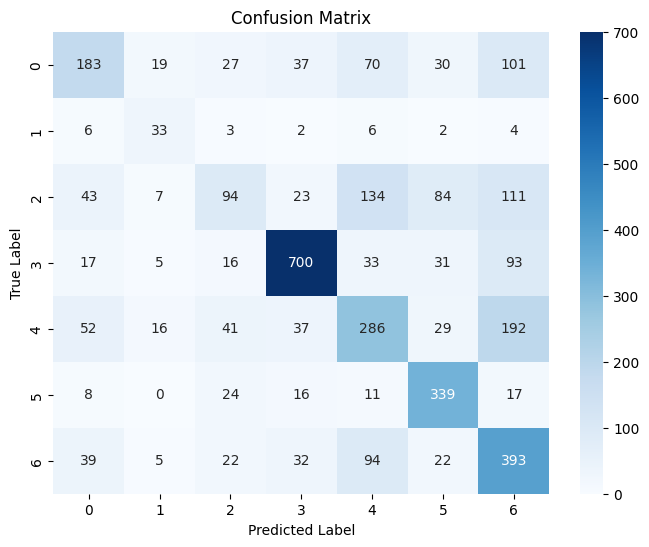

In [15]:
import torch
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# data_directory = 'Datasets/FER_ResEmoteNet_Augmented'
data_directory = 'Datasets/FER_ResEmoteNet'
# data_directory = 'Datasets/JAFFE_ResEmoteNet'

test_dataset = Four4All(csv_file=data_directory+'/test/labels.csv', 
                        img_dir=data_directory+'/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

num_classes = 7 #test_dataset.labels.iloc[:, 1].nunique()
print(f"Number of classes: {num_classes}")

# Load your best model
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)  # Adjust number of classes as per your dataset
model = model.to(device)

model.load_state_dict(torch.load('Datasets\\FER_ResEmoteNet\\best_model_0.001_16_0.9_0.0001.pth', weights_only=True))

model.eval()

all_preds = []
all_labels = []

# Iterate through test_loader to collect predictions and ground truth labels
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        # Get the predicted class (assumes outputs are logits)
        _, predicted = torch.max(outputs, 1)
        all_preds.append(predicted.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

# Concatenate lists to form single arrays
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_weighted = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
precision_macro = precision_score(all_labels, all_preds, average='macro', zero_division=0)
precision_micro = precision_score(all_labels, all_preds, average='micro', zero_division=0)

recall_weighted = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
recall_macro = recall_score(all_labels, all_preds, average='macro', zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average='micro', zero_division=0)

f1_weighted = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average='micro', zero_division=0)

report = classification_report(all_labels, all_preds, zero_division=0)
cm = confusion_matrix(all_labels, all_preds)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision (Weighted):", precision_weighted)
print("Precision (Macro):", precision_macro)
print("Precision (Micro):", precision_micro)
print("Recall (Weighted):", recall_weighted)
print("Recall (Macro):", recall_macro)
print("Recall (Micro):", recall_micro)
print("F1 Score (Weighted):", f1_weighted)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (Micro):", f1_micro)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

# (Optional) Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Testing On Single Images

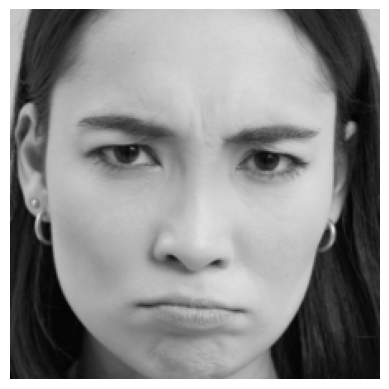

tensor([[0.3262, 0.1383, 0.1209, 0.1250, 0.2108, 0.0788]], device='cuda:0')
Predicted label index: 0
Predicted emotion: happy


In [ ]:
# import cv2
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# import torch.nn.functional as F
# from PIL import Image
# from torchvision import transforms

# # Load OpenCV's Haar cascade for face detection
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Define transformations (same as used in training)
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to match model input
#     transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels (if needed)
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# def detect_and_crop_face(image_path):
#     """Detects the largest face in an image and returns the cropped face."""
#     image = cv2.imread(image_path)  # Read image using OpenCV
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for detection

#     # Detect faces
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

#     if len(faces) == 0:
#         print("No face detected, using the original image.")
#         return Image.open(image_path)  # Return the full image if no face is found

#     # Select the largest face (assuming it is the main subject)
#     x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])

#     # Crop the detected face
#     face_crop = image[y:y+h, x:x+w]

#     # Convert cropped face to PIL image
#     return Image.fromarray(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))

# # Display the transformed image before passing it to the model
# def show_transformed_image(tensor):
#     """Convert a tensor back to a visual image and display it."""
#     tensor = tensor.clone().detach().cpu().numpy().transpose(1, 2, 0)

#     # Undo normalization
#     mean = [0.485, 0.456, 0.406]
#     std = [0.229, 0.224, 0.225]
#     tensor = tensor * std + mean  # De-normalize
#     tensor = np.clip(tensor, 0, 1)  # Ensure values are in range [0,1]

#     plt.imshow(tensor)
#     plt.axis('off')
#     plt.show()


# for img in ['ANG', 'DIS', 'FEA', 'HAP', 'SAD', 'SUR']:
#     image_path = 'testing.jpg'#f'JAFFE_ResEmoteNet\\validation\\val_0_{img}.tiff'

#     face_image = detect_and_crop_face(image_path)

#     # Apply transformations
#     input_tensor = transform(face_image)

#     # Show the transformed face image
#     show_transformed_image(input_tensor)

#     # Add batch dimension and move to device
#     input_tensor = input_tensor.unsqueeze(0).to(device)

#     # Load model
#     model.load_state_dict(torch.load('best_resnet50_fer.pth'))  # Load best model
#     model.eval()

#     # Run inference
#     with torch.no_grad():
#         outputs = model(input_tensor)
#         probabilities = F.softmax(outputs, dim=1)
#         print(probabilities)
#         _, predicted = torch.max(outputs, 1)
#         predicted_label = predicted.item()

#     # Label mapping
#     label_map = {0: 'happy', 1: 'surprise', 2: 'sad', 3: 'anger', 4: 'disgust', 5: 'fear'}
#     emotion = label_map.get(predicted_label, "Unknown")

#     print(f"Predicted label index: {predicted_label}")
#     print(f"Predicted emotion: {emotion}")
#     break
